<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Training and testing the Model](#section4)<br>
    - 4.1 [Splitting data into training and test datasets](#section401)<br>
    - 4.2 [Linear regression in scikit-learn](#section402)<br>
    - 4.3 [Interpreting Model Coefficients](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
    
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Standardisation of data](#section6)<br>
7. [Feature Selection](#section7)<br>
8. [Handling Categorical Features](#section8)<br>

<a id=section1></a>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

/Users/neelmanigupta/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head(100)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
96,163.3,31.6,52.9,16.9
97,197.6,3.5,5.9,11.7
98,184.9,21.0,22.0,15.5
99,289.7,42.3,51.2,25.4


In [3]:
data.shape

(200, 4)

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

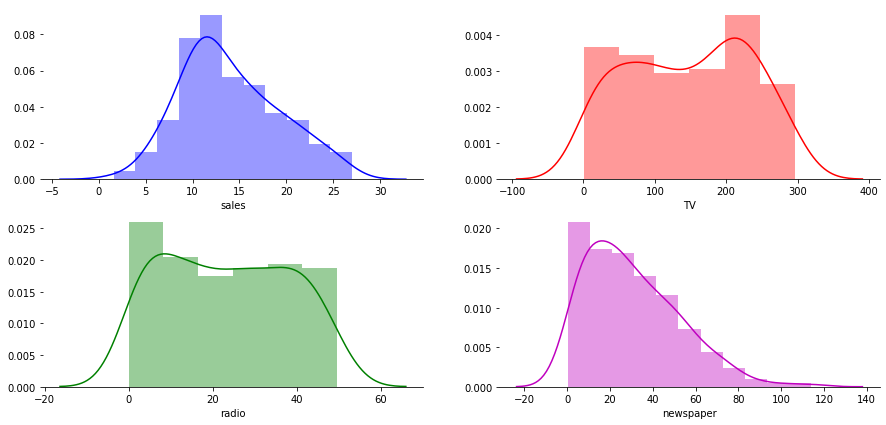

In [6]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])

sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])

### Is there a relationship between sales and spend various advertising channels?

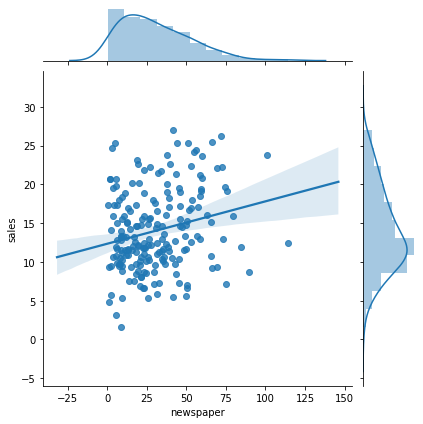

In [7]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')

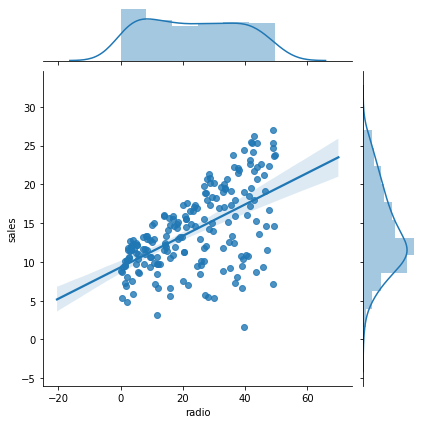

In [8]:
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')

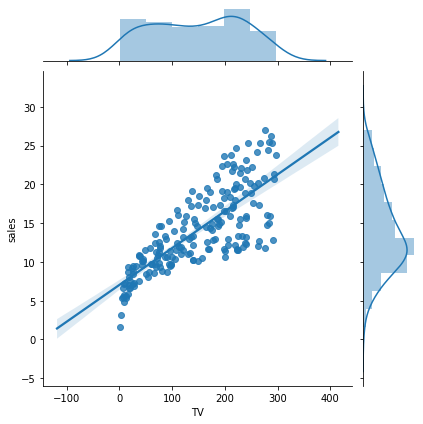

In [9]:
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlaed where are _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

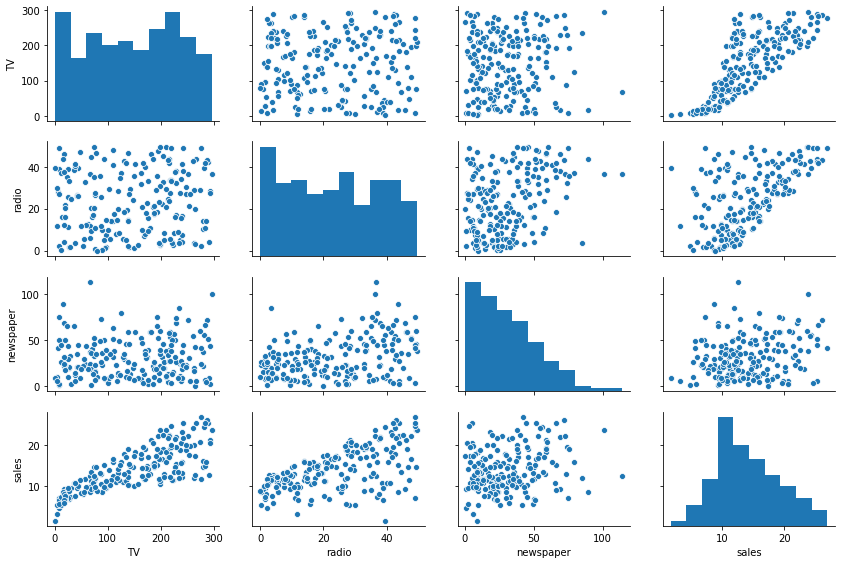

In [10]:
sns.pairplot(data, height = 2, aspect = 1.5)

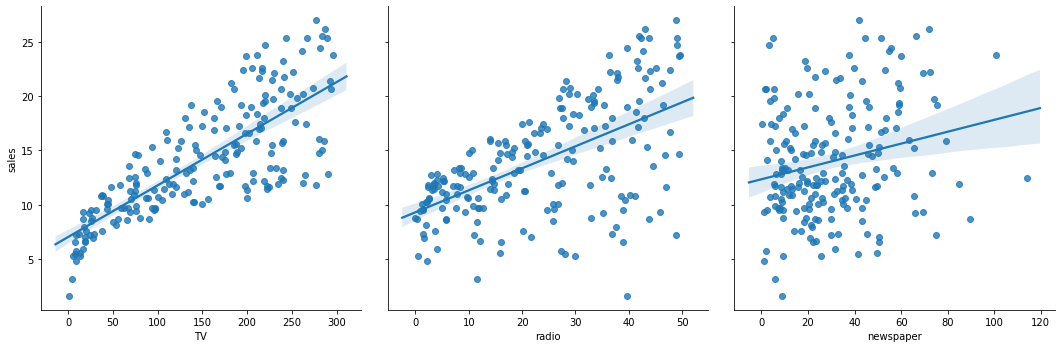

In [11]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and plotting heatmap correlation

In [12]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


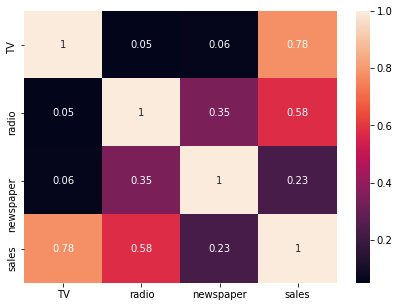

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show()

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


<a id=section4></a>

## 4. Training and Testing the Model

<a id=section401></a>

### 4.1 Splitting data into training and test datasets. "WHY?"

In [14]:
features = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
target = ['sales']                                     # Define the target variable

In [15]:
data[features]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [16]:
data[target]

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=0)

In [18]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160, 1)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40, 1)


In [19]:
X_train.head()

,TV,radio,newspaper
135,36.9,38.6,65.6
67,31.5,24.6,2.2
27,142.9,29.3,12.6
114,209.6,20.6,10.7
169,215.4,23.6,57.6


In [20]:
y_train.head()

,sales
135,10.8
67,9.5
27,15.0
114,15.9
169,17.1


In [21]:
X_test.head()

,TV,radio,newspaper
19,69.2,20.5,18.3
171,50.0,11.6,18.4
108,90.4,0.3,23.2
99,289.7,42.3,51.2
178,170.2,7.8,35.2


In [22]:
y_test.head()

,sales
19,11.3
171,8.4
108,8.7
99,25.4
178,11.7


<a id=section402></a>

### 4.2 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Evaluate - Calculate RMSE and R square

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    ll_model.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    r2_test = metrics.r2_score(y_test, y_pred_test)```

In [23]:
#Instantiating the model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [24]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
#y = mx + c

<a id=section403></a>

### 4.3 Interpreting Model Coefficients

In [26]:
print('Intercept:',lr_model.intercept_)          # print the intercept 
print('Coefficients:',lr_model.coef_)  

Intercept: [2.99489303]
Coefficients: [[ 0.04458402  0.19649703 -0.00278146]]


In [27]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [28]:
(lr_model.coef_).T

array([[ 0.04458402],
       [ 0.19649703],
       [-0.00278146]])

In [29]:
pd.DataFrame((lr_model.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
radio,0.196497
TV,0.044584
newspaper,-0.002781


__y = 2.9 + 0.045 `*` TV + 0.19 `*` radio - 0.0027 `*` newspaper__

How do we interpret the TV coefficient (0.045)
- A "unit" increase in TV ad spending is **associated with** a _"0.045_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of ~0.045 * 1000 = 45 widgets.

Important Notes:
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

<a id=section404></a>

### 4.4 Using the Model for Prediction

In [30]:
y_pred_train = lr_model.predict(X_train)  

In [31]:
y_pred_train                                                         # make predictions on the training set

array([[12.04236485],
       [ 9.22699748],
       [15.08826616],
       [16.35778089],
       [17.07540865],
       [13.36661981],
       [ 3.78817791],
       [12.08662048],
       [15.62955297],
       [ 8.68273227],
       [10.61195362],
       [19.36739522],
       [18.41226024],
       [15.30372386],
       [10.00012405],
       [ 8.19743932],
       [21.49425935],
       [14.15684188],
       [16.3171467 ],
       [ 8.72677043],
       [15.26881361],
       [12.47602439],
       [13.7213733 ],
       [14.20527235],
       [18.32820674],
       [19.11937848],
       [20.32200442],
       [17.49488834],
       [ 9.34748691],
       [11.75581878],
       [19.85996966],
       [ 9.91949478],
       [20.71025022],
       [23.06178922],
       [10.08383292],
       [17.13980942],
       [19.65212394],
       [18.43129662],
       [16.91732121],
       [18.37653406],
       [17.10374151],
       [ 8.84010201],
       [ 9.94425907],
       [ 5.38665742],
       [ 3.58633703],
       [16

In [32]:
y_pred_test = lr_model.predict(X_test)                                  # make predictions on the testing set

In [33]:
y_pred_test

array([[10.05739563],
       [ 7.4522807 ],
       [ 7.0197076 ],
       [24.08029725],
       [12.01786259],
       [ 6.53793858],
       [12.78286918],
       [15.10974587],
       [10.76974013],
       [16.34357951],
       [22.88297477],
       [ 9.12924467],
       [10.46455672],
       [15.48743552],
       [11.58555633],
       [12.17296914],
       [18.76551502],
       [10.78318566],
       [15.90515992],
       [17.30651279],
       [24.06692057],
       [ 9.59834224],
       [15.13512211],
       [12.38591525],
       [ 5.71360885],
       [15.24749314],
       [12.29402334],
       [20.9421167 ],
       [13.40991558],
       [ 9.04348832],
       [12.89239415],
       [21.40272028],
       [18.13802209],
       [21.17320803],
       [ 6.56974433],
       [ 6.14114206],
       [ 7.89018394],
       [13.01541434],
       [14.68953791],
       [ 6.18835143]])

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [34]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [35]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.2131871622729429
MAE for test set is 1.3617813502090275


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [36]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [37]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.406814755818906
MSE for test set is 4.402118291449685


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [38]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [39]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5513912323520802
RMSE for test set is 2.0981225634956804


In [40]:
data['sales'].mean()

14.0225

In [41]:
RMSE_test/data['sales'].mean()

0.14962542795476413

Comparing these metrics:
- __RMSE__ is more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section502></a>

### 5.2 Model Evaluation using Rsquared value.

In [42]:
# r2_score is a standard metric in the sklearn library
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.9067114990146383
R-Squared of test data: 0.8601145185017868


<a id=section6></a>

### 6. Standardisation of data

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

**"Why do we need this?"**

**z = (x-x_mean)/stdev**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data) 

In [49]:
data1

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [45]:
data_st = pd.DataFrame(data1)
data_st.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [46]:
data_st.columns = ['TV','radio','newspaper','sales']
# data.head()

In [47]:
data_st.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [48]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [50]:
data_st.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [51]:
features_st = ['TV','radio','newspaper']
target_st = ['sales']

In [57]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(data_st[features_st], data_st[target_st], test_size=0.20, random_state=1)
lr_model_st = LinearRegression()

In [58]:
lr_model_st.fit(X_train_st,y_train_st)

LinearRegression()

In [59]:
print('Intercept:',lr_model_st.intercept_)          # print the intercept 
print('Coefficients:',lr_model_st.coef_)  

Intercept: [0.00116209]
Coefficients: [[0.77081214 0.50806629 0.01079522]]


In [55]:
pd.DataFrame((lr_model_st.coef_).T,index=X_train_st.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
TV,0.770812
radio,0.508066
newspaper,0.010795


In [56]:
## The original Coefficients
pd.DataFrame((lr_model.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
radio,0.196497
TV,0.044584
newspaper,-0.002781


In [60]:
data_st.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [61]:
y_pred_train_st = lr_model_st.predict(X_train_st)  

In [62]:
y_pred_test_st = lr_model_st.predict(X_test_st)                # make predictions on the testing set

In [63]:
RMSE_train_st = np.sqrt( metrics.mean_squared_error(y_train_st, y_pred_train_st))
RMSE_test_st = np.sqrt(metrics.mean_squared_error(y_test_st, y_pred_test_st))

In [64]:
print('RMSE for training set is {}'.format(RMSE_train_st))
print('RMSE for test set is {}'.format(RMSE_test_st))

RMSE for training set is 0.33373755512865727
RMSE for test set is 0.27118259234744946


In [65]:
## The original Coefficients
RMSE_test

2.0981225634956804

In [66]:
RMSE_test_st/data_st['sales'].mean()

-1606970818217550.8

In [67]:
RMSE_test/data['sales'].mean()

0.14962542795476413

In [ ]:
LR model w/o Stand = RMSE_lr = 5
RF model w/o Stand = RMSE_rf = 4

LR model Stand = RMSE_lr = 0.4
RF model Stand = RMSE_rf = 0.6

In [68]:
r2_test_st = metrics.r2_score(y_test_st, y_pred_test_st)
r2_test_st

0.8927605914615385

In [69]:
r2_test

0.8601145185017868

<a id=section7></a>

## 7. Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check whether __"newspaper"__ improve the quality of our predictions or not.<br/> 
To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.

In [70]:
features_2 = ['TV','radio']                     # create a Python list of feature names
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[features_2], data[target], test_size=0.20, random_state=0)
lr_model_2 = LinearRegression()

In [71]:
lr_model_2.fit(X_train_2,y_train_2)

LinearRegression()

In [72]:
print('Intercept:',lr_model_2.intercept_)          # print the intercept 
print('Coefficients:',lr_model_2.coef_)  

Intercept: [2.95144076]
Coefficients: [[0.04451639 0.19520741]]


In [73]:
pd.DataFrame((lr_model_2.coef_).T,index=X_train_2.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
radio,0.195207
TV,0.044516


In [74]:
y_pred_train_2 = lr_model_2.predict(X_train_2)  

In [75]:
y_pred_test_2 = lr_model_2.predict(X_test_2)                # make predictions on the testing set

In [76]:
RMSE_train_2 = np.sqrt( metrics.mean_squared_error(y_train_2, y_pred_train_2))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_2))

In [77]:
print('RMSE for training set is {}'.format(RMSE_train_2))
print('RMSE for test set is {}'.format(RMSE_test_2))

RMSE for training set is 1.5524010871086755
RMSE for test set is 2.09557385066284


In [ ]:
#RMSE_test_2 = 2.1

In [78]:
RMSE_test

2.0981225634956804

In [79]:
r2_test_2 = metrics.r2_score(y_test_2, y_pred_test_2)

In [80]:
r2_test_2

0.8604541663186569

In [81]:
r2_test

0.8601145185017868

After discarding "newspaper" there is no significant change in the model. Hence the explanatory power of "newspaper" is low.

<a id=section8></a>

## 8.  Handling Categorical Features

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban** :

In [82]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [83]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'

data.head(50)

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban
6,8.7,48.9,75.0,7.2,suburban
7,57.5,32.8,23.5,11.8,suburban
8,120.2,19.6,11.6,13.2,urban
9,8.6,2.1,1.0,4.8,rural
10,199.8,2.6,21.2,10.6,suburban


# Some EDA of categorical variable

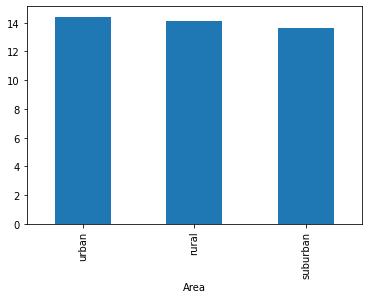

In [88]:
data.groupby(['Area'])['sales'].mean().sort_values(ascending=False).plot(kind = 'bar');

In [89]:
data.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban


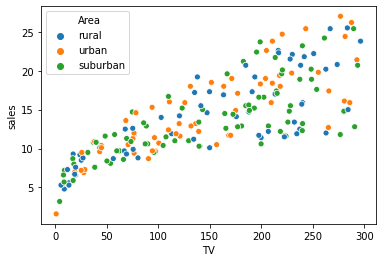

In [90]:
a = sns.scatterplot(x="TV", y="sales", data=data, hue='Area')

We want to represent Area numerically, but we can't simply code it as:<br/>
- 0 = rural,<br/>
- 1 = suburban,<br/>
- 2 = urban<br/>
Because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category.<br/> Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable to represent the categories numerically (such as 1, 2, 3, 4, 5).<br/>

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [94]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales', 'Area'], dtype='object')

In [95]:
features = ['TV', 'radio', 'newspaper', 'Area']
cat_cols = ['Area']                                           # Define the categorical variables

In [96]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_with_dummies.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,0,0
2,44.5,39.3,45.1,10.4,0,1
3,17.2,45.9,69.3,9.3,0,0
4,151.5,41.3,58.5,18.5,0,1
5,180.8,10.8,58.4,12.9,1,0


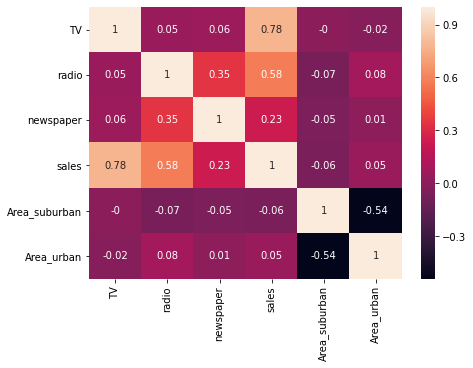

In [97]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data_with_dummies.corr(),2),annot=True)
plt.show()

Here is how we interpret the coding:
- **rural** is coded as  Area_suburban = 0  and  Area_urban = 0
- **suburban** is coded as  Area_suburban = 1  and  Area_urban = 0
- **urban** is coded as  Area_suburban = 0  and  Area_urban = 1

If this sounds confusing, think in general terms that why we need only __k-1 dummy variables__ if we have a categorical feature with __k "levels"__.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model.

In [98]:
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']  # create a Python list of feature names
X = data_with_dummies[feature_cols]  
y = data_with_dummies.sales
lr_model_cat = LinearRegression()

In [99]:
lr_model_cat.fit(X,y)

LinearRegression()

In [101]:
y_pred_cat = lr_model_cat.predict(X)  

In [102]:
pd.DataFrame((lr_model_cat.coef_).T,index=X.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
Area_urban,0.253522
radio,0.187617
TV,0.045802
newspaper,-0.001018
Area_suburban,-0.117890


In [103]:
print('Intercept:',lr_model_cat.intercept_)

Intercept: 2.9201242206744418


In [106]:
X.head()

,TV,radio,newspaper,Area_suburban,Area_urban
1,230.1,37.8,69.2,0,0
2,44.5,39.3,45.1,0,1
3,17.2,45.9,69.3,0,0
4,151.5,41.3,58.5,0,1
5,180.8,10.8,58.4,1,0


__y =  2.92 + 0.045 `*` TV + 0.187 `*` radio - 0.001 `*` newspaper - 0.117 `*` Area_suburban + 0.253 `*` Area_urban__<br/>
How do we interpret the coefficients?<br/>
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 0.1178 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 0.2535 widgets (as compared to rural).

ORIGINAL EQUATION

__y = 2.9 + 0.0468 `*` TV + 0.1785 `*` radio + 0.00258 `*` newspaper__

In [107]:
data_with_dummies['predictions'] = y_pred_cat

In [110]:
data_with_dummies.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions,error
1,230.1,37.8,69.2,22.1,0,0,20.480693,1.619307
2,44.5,39.3,45.1,10.4,0,1,12.539271,-2.139271
3,17.2,45.9,69.3,9.3,0,0,12.248978,-2.948978
4,151.5,41.3,58.5,18.5,0,1,17.801707,0.698293
5,180.8,10.8,58.4,12.9,1,0,13.050091,-0.150091


In [109]:
data_with_dummies['error'] = data_with_dummies['sales'] - data_with_dummies['predictions']

In [111]:
data_with_dummies['error'].describe()

count    2.000000e+02
mean    -2.842171e-16
std      1.665431e+00
min     -9.026476e+00
25%     -8.598808e-01
50%      2.789279e-01
75%      1.176990e+00
max      2.592033e+00
Name: error, dtype: float64

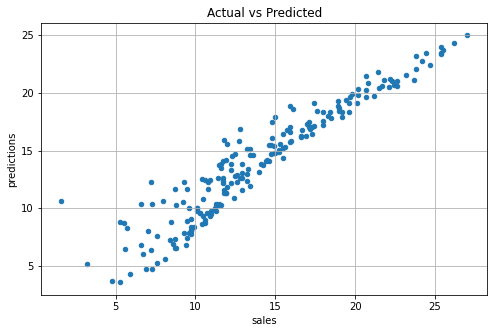

In [112]:
data_with_dummies.plot.scatter(x='sales', y='predictions',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

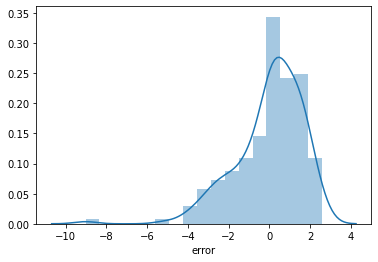

In [113]:
sns.distplot(data_with_dummies['error'])

In [114]:
data_with_dummies[data_with_dummies['error']<-4]

,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions,error
6,8.7,48.9,75.0,7.2,1,0,12.298815,-5.098815
36,290.7,4.1,8.5,12.8,1,0,16.877537,-4.077537
131,0.7,39.6,8.7,1.6,0,1,10.626476,-9.026476
179,276.7,2.3,23.7,11.8,1,0,15.883118,-4.083118


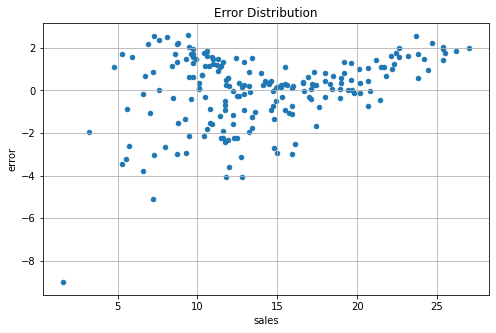

In [116]:
data_with_dummies.plot.scatter(x='sales', y='error',\
                      figsize=(8,5), grid=True, title='Error Distribution');

In [ ]:
data_with_dummies.to_csv('data_with_predictions.csv')

<a id=section8></a>